In [45]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.precision', 3)
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import seaborn as sns
from google.colab import files
import io

from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [21]:
uploaded = files.upload()

Saving 15 - crabs.csv to 15 - crabs (1).csv


In [22]:
crabs = pd.read_csv("15 - crabs.csv")
crabs.head()

,sp,sex,index,FL,RW,CL,CW,BD
0,B,M,1,8.1,6.7,16.1,19.0,7.0
1,B,M,2,8.8,7.7,18.1,20.8,7.4
2,B,M,3,9.2,7.8,19.0,22.4,7.7
3,B,M,4,9.6,7.9,20.1,23.1,8.2
4,B,M,5,9.8,8.0,20.3,23.0,8.2


In [23]:
crabs.describe()

,index,FL,RW,CL,CW,BD
count,200.000,200.000,200.000,200.000,200.000,200.000
mean,25.500,15.583,12.738,32.105,36.415,14.030
std,14.467,3.495,2.573,7.119,7.872,3.425
min,1.000,7.200,6.500,14.700,17.100,6.100
25%,13.000,12.900,11.000,27.275,31.500,11.400
50%,25.500,15.550,12.800,32.100,36.800,13.900
75%,38.000,18.050,14.300,37.225,42.000,16.600
max,50.000,23.100,20.200,47.600,54.600,21.600


In [5]:
crabs.shape

(200, 8)

In [24]:
crabs_data = crabs.rename(columns={'sp':'species','FL':'Frontal Lobe', 'RW':'Rear Width', 'CL':'Carapage Midline', 'CW':'Maximum Width', 'BD':'Body Depth'})

crabs_data['species'] = crabs_data['species'].map({'B':'Blue', 'O':'Orange'})
crabs_data['sex'] = crabs_data['sex'].map({'M':'Male', 'F':'Female'})

In [25]:
crabs_data['class'] = crabs_data.species + crabs_data.sex

In [8]:
crabs_data.head(10)

,species,sex,index,Frontal Lobe,Rear Width,Carapage Midline,Maximum Width,Body Depth,class
0,Blue,Male,1,8.1,6.7,16.1,19.0,7.0,BlueMale
1,Blue,Male,2,8.8,7.7,18.1,20.8,7.4,BlueMale
2,Blue,Male,3,9.2,7.8,19.0,22.4,7.7,BlueMale
3,Blue,Male,4,9.6,7.9,20.1,23.1,8.2,BlueMale
4,Blue,Male,5,9.8,8.0,20.3,23.0,8.2,BlueMale
5,Blue,Male,6,10.8,9.0,23.0,26.5,9.8,BlueMale
6,Blue,Male,7,11.1,9.9,23.8,27.1,9.8,BlueMale
7,Blue,Male,8,11.6,9.1,24.5,28.4,10.4,BlueMale
8,Blue,Male,9,11.8,9.6,24.2,27.8,9.7,BlueMale
9,Blue,Male,10,11.8,10.5,25.2,29.3,10.3,BlueMale


In [26]:
data_columns = ['Frontal Lobe', 'Rear Width','Carapage Midline','Maximum Width', 'Body Depth']
crabs_data[data_columns].describe()

,Frontal Lobe,Rear Width,Carapage Midline,Maximum Width,Body Depth
count,200.000,200.000,200.000,200.000,200.000
mean,15.583,12.738,32.105,36.415,14.030
std,3.495,2.573,7.119,7.872,3.425
min,7.200,6.500,14.700,17.100,6.100
25%,12.900,11.000,27.275,31.500,11.400
50%,15.550,12.800,32.100,36.800,13.900
75%,18.050,14.300,37.225,42.000,16.600
max,23.100,20.200,47.600,54.600,21.600


## t-Stochastic Neighbor Embedding
tSNE transforms the distance between points into probabilities and then tries to keep same probability distributions while transforming the data to a lower dimension space.

### Using raw data

<Axes: xlabel='TSNE1', ylabel='TSNE2'>

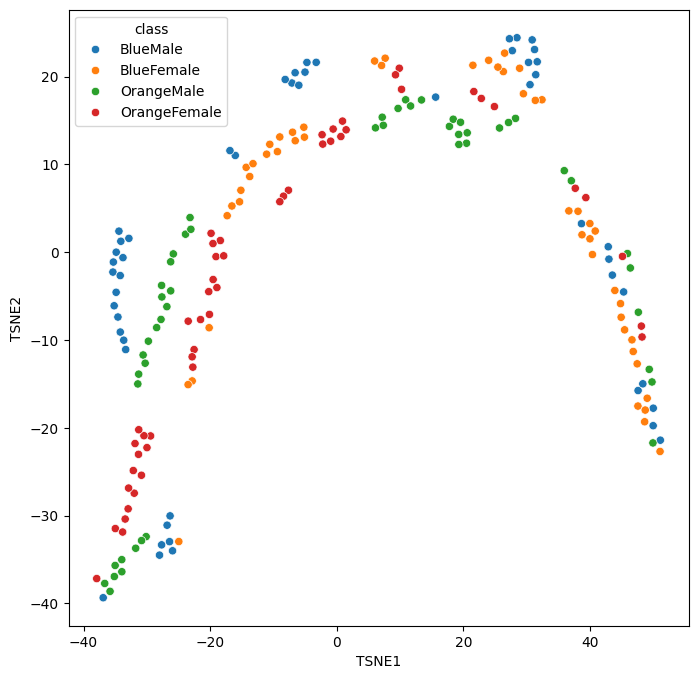

In [10]:
# 2 Dimension
crabs_tsne = TSNE(n_components = 2, perplexity = 10, n_iter=2000, init='random').fit_transform(crabs_data[data_columns])
crabs_data[['TSNE1', 'TSNE2']] = crabs_tsne

fig = plt.figure(figsize=(8,8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='class', data=crabs_data)



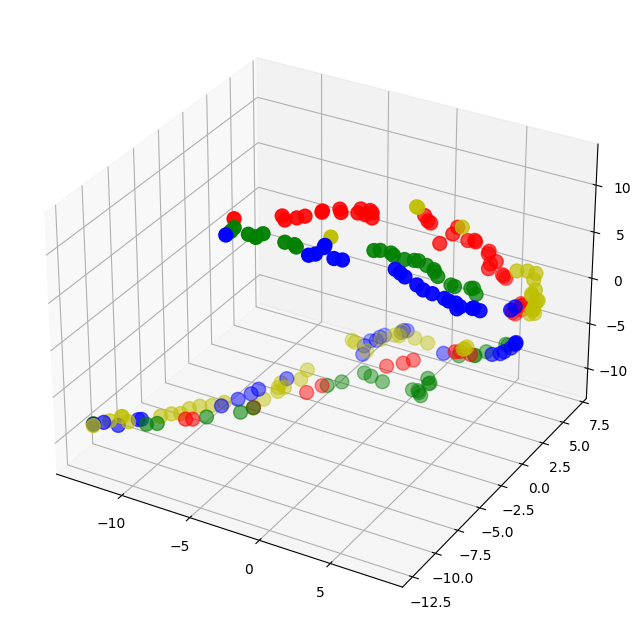

In [11]:
# 3 dimension
crabs_tsne = TSNE(n_components = 3, perplexity = 10, n_iter=2000, init='random').fit_transform(crabs_data[data_columns])
crabs_data[['TSNE1', 'TSNE2','TSNE3']] = crabs_tsne

color_crabs= {'BlueFemale': 'y', 'BlueMale': 'b', 'OrangeFemale': 'r', 'OrangeMale': 'g'}

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(crabs_data.TSNE1, crabs_data.TSNE2,zs=crabs_data.TSNE3, depthshade='False', c=crabs_data['class'].apply(lambda x: color_crabs[x]),s=100)

In [12]:
fig = px.scatter_3d(crabs_data, x = 'TSNE1', y='TSNE2', z='TSNE3', color='class')
fig.show()

## Using on the scaled data

In [27]:
crabs_data.head()

,species,sex,index,Frontal Lobe,Rear Width,Carapage Midline,Maximum Width,Body Depth,class
0,Blue,Male,1,8.1,6.7,16.1,19.0,7.0,BlueMale
1,Blue,Male,2,8.8,7.7,18.1,20.8,7.4,BlueMale
2,Blue,Male,3,9.2,7.8,19.0,22.4,7.7,BlueMale
3,Blue,Male,4,9.6,7.9,20.1,23.1,8.2,BlueMale
4,Blue,Male,5,9.8,8.0,20.3,23.0,8.2,BlueMale


In [28]:
crabs_min_max = crabs_data.copy()
crabs_min_max[data_columns] = MinMaxScaler().fit_transform(crabs_data[data_columns])

In [40]:
crabs_min_max.head()

,species,sex,index,Frontal Lobe,Rear Width,Carapage Midline,Maximum Width,Body Depth,class,TSNE1,TSNE2
0,Blue,Male,1,0.057,0.015,0.043,0.051,0.058,BlueMale,16.261,51.982
1,Blue,Male,2,0.101,0.088,0.103,0.099,0.084,BlueMale,14.302,51.350
2,Blue,Male,3,0.126,0.095,0.131,0.141,0.103,BlueMale,13.212,50.149
3,Blue,Male,4,0.151,0.102,0.164,0.160,0.135,BlueMale,11.681,49.303
4,Blue,Male,5,0.164,0.109,0.170,0.157,0.135,BlueMale,10.634,49.688


<Axes: xlabel='TSNE1', ylabel='TSNE2'>

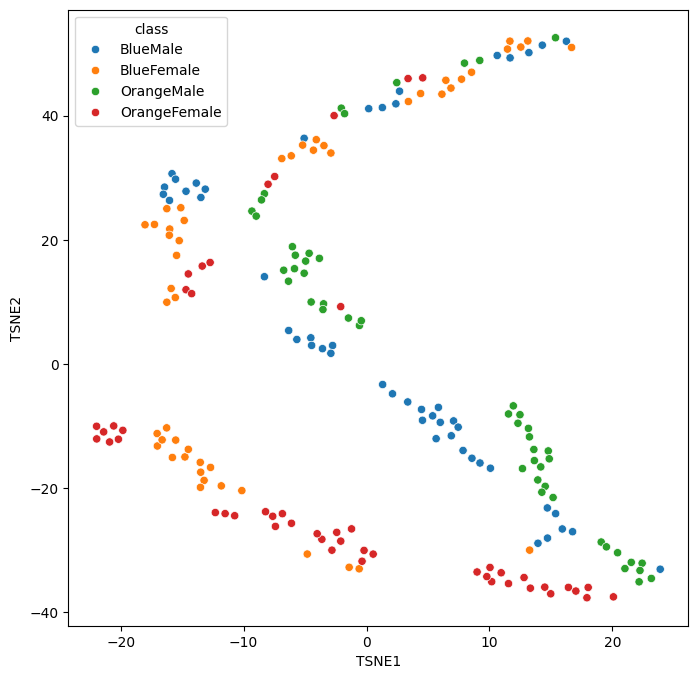

In [39]:
# 2D
crabs_tsne = TSNE(n_components=2, perplexity=10, n_iter=1000, init='random').fit_transform(crabs_min_max[data_columns])
crabs_min_max[['TSNE1', 'TSNE2']] = crabs_tsne

fig = plt.figure(figsize=(8,8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='class',data = crabs_min_max)

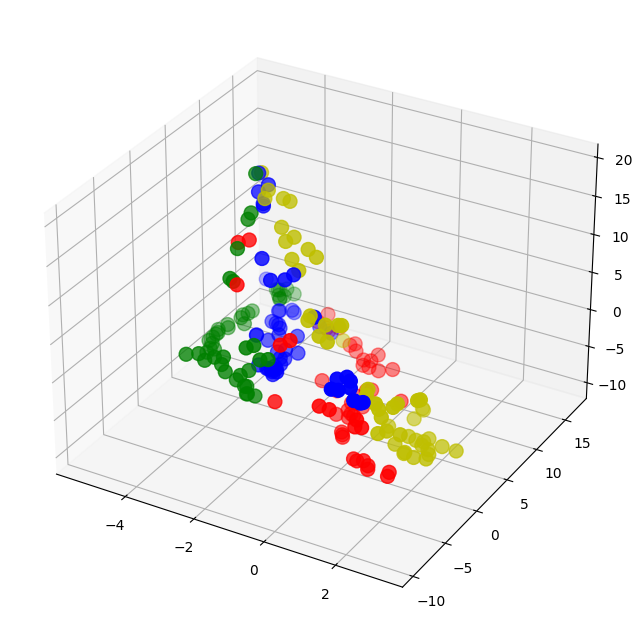

In [41]:
# 3D
crabs_tsne = TSNE(n_components = 3, perplexity = 10, n_iter=2000, init='random').fit_transform(crabs_min_max[data_columns])
crabs_min_max[['TSNE1', 'TSNE2','TSNE3']] = crabs_tsne

color_crabs= {'BlueFemale': 'y', 'BlueMale': 'b', 'OrangeFemale': 'r', 'OrangeMale': 'g'}

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(crabs_min_max.TSNE1, crabs_min_max.TSNE2,zs=crabs_min_max.TSNE3, depthshade='False', c=crabs_min_max['class'].apply(lambda x: color_crabs[x]),s=100)

In [42]:
fig = px.scatter_3d(crabs_min_max, x = 'TSNE1', y='TSNE2', z='TSNE3', color='class')
fig.show()

## Using on Standardized Data

In [ ]:
 crabs_data.describe()

In [47]:
crabs_standardized = crabs_data.copy()
crabs_standardized[data_columns] = StandardScaler().fit_transform(crabs_data[data_columns])


In [ ]:
crabs_standardized.describe()

<Axes: xlabel='TSNE1', ylabel='TSNE2'>

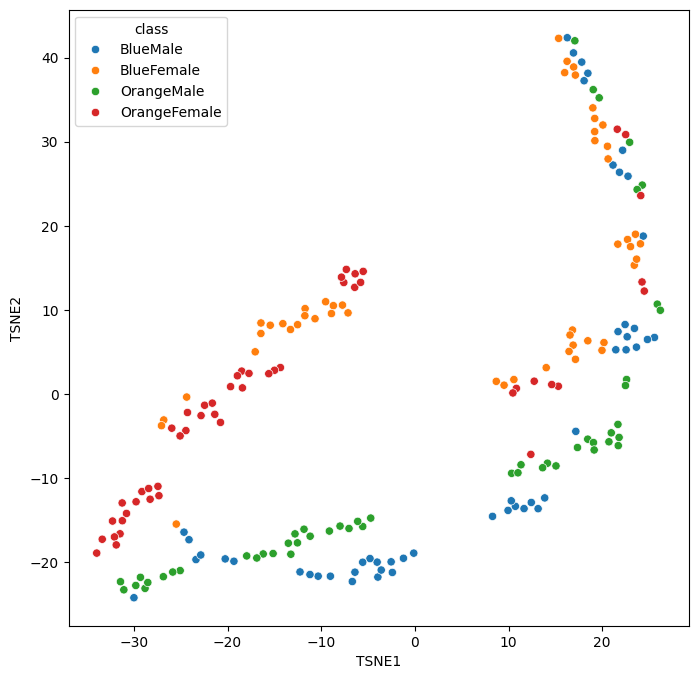

In [51]:
# 2D
crabs_tsne = TSNE(n_components=2, perplexity=10, n_iter=1000, init='random').fit_transform(crabs_standardized[data_columns])
crabs_standardized[['TSNE1', 'TSNE2']] = crabs_tsne

fig = plt.figure(figsize=(8,8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='class',data = crabs_standardized)

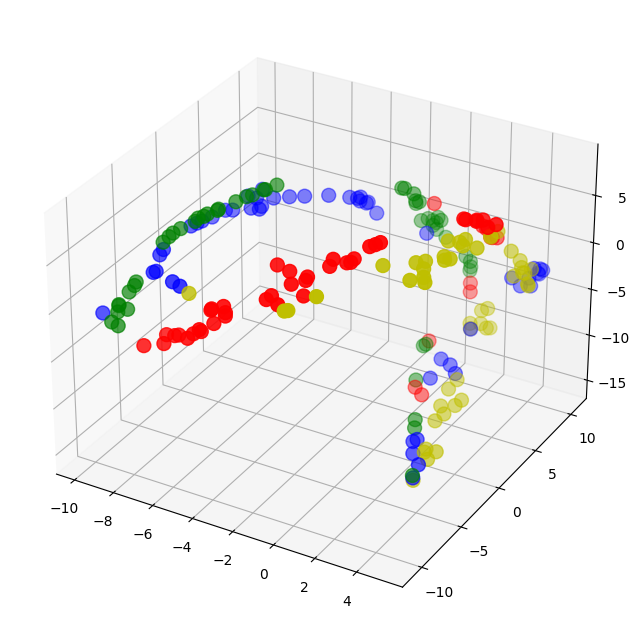

In [52]:
# 3D
crabs_tsne = TSNE(n_components = 3, perplexity = 10, n_iter=2000, init='random').fit_transform(crabs_standardized[data_columns])
crabs_standardized[['TSNE1', 'TSNE2','TSNE3']] = crabs_tsne

color_crabs= {'BlueFemale': 'y', 'BlueMale': 'b', 'OrangeFemale': 'r', 'OrangeMale': 'g'}

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(crabs_standardized.TSNE1, crabs_standardized.TSNE2,zs=crabs_standardized.TSNE3, depthshade='False', c=crabs_standardized['class'].apply(lambda x: color_crabs[x]),s=100)